# Compare Solar Potential Across Countries
This notebook synthesizes cleaned datasets from Benin, Sierra Leone, and Togo to compare solar potential and identify key differences.

## Setup
Install libraries and load the datasets.

## Metric Comparison
Visualize and summarize GHI, DNI, and DHI across countries.

## Statistical Testing
Perform ANOVA to test for significant differences in GHI.

## Key Observations
Summarize findings in a markdown cell.

## Visual Summary (Bonus)
Rank countries by average GHI.

## Key Performance Indicators (KPIs)
Ensure all requirements are met.

In [4]:
# Import libraries for data analysis, visualization, and statistical testing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal  # For ANOVA and Kruskal-Wallis tests

# Set plot style for better visuals
sns.set_style("whitegrid")

In [5]:
# Load cleaned datasets for each country
benin_df = pd.read_csv('../../data/benin_clean.csv')
sierra_leone_df = pd.read_csv('../../data/sierra_leone_clean.csv')
togo_df = pd.read_csv('../../data/togo_clean.csv')

# Add a 'Country' column to each DataFrame for identification
benin_df['Country'] = 'Benin'
sierra_leone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine the datasets into one DataFrame
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())
print("\nShape of combined DataFrame:", combined_df.shape)

             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01:00  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02:00  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03:00  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7   

   ...  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Comments  \
0  ...      0.0  998         0            0.0   26.3   26.2       NaN   
1  ...      0.0  998         0            0.0   26.3   26.2       NaN   
2  ...      1.5  997         0            0.0   26.4   26.2       NaN   
3  ...      1.3  997         0            0.0   26.4   26.3       NaN   
4  ...      1.0  997         0            0.0   26.4   26.3       NaN   

   Country  Month Hour  
0    Benin    NaN  NaN  
1    Benin    NaN  NaN  
2    Benin    NaN

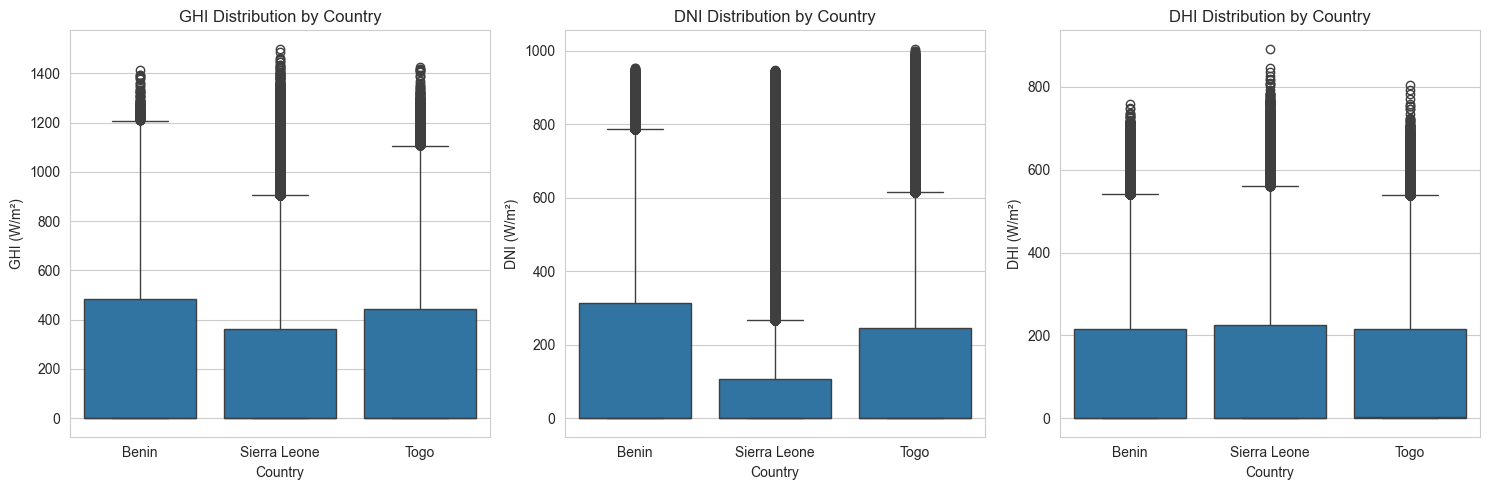

In [6]:
# Create boxplots for GHI, DNI, and DHI side-by-side
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined_df)
    plt.title(f'{metric} Distribution by Country')
    plt.xlabel('Country')
    plt.ylabel(f'{metric} (W/m²)')

plt.tight_layout()
plt.show()

In [7]:
# Compute mean, median, and standard deviation for GHI, DNI, DHI by country
summary_stats = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

# Flatten the column names for better readability
summary_stats.columns = [f'{metric}_{stat}' for metric, stat in summary_stats.columns]

# Display the summary table
print("Summary Table (Mean, Median, Std Dev) for GHI, DNI, DHI:")
print(summary_stats)

Summary Table (Mean, Median, Std Dev) for GHI, DNI, DHI:
              GHI_mean  GHI_median  GHI_std  DNI_mean  DNI_median  DNI_std  \
Country                                                                      
Benin           241.96         1.8   330.10    167.44         0.0   261.55   
Sierra Leone    204.41         0.3   296.79    116.52         0.0   218.57   
Togo            231.72         2.1   321.69    151.26         0.0   250.96   

              DHI_mean  DHI_median  DHI_std  
Country                                      
Benin           116.99         1.6   157.46  
Sierra Leone    116.27         0.0   157.02  
Togo            116.44         2.5   156.52  


In [7]:
# Extract GHI values for each country
ghi_benin = benin_df['GHI']
ghi_sierra_leone = sierra_leone_df['GHI']
ghi_togo = togo_df['GHI']

# Run one-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)
print(f"One-way ANOVA on GHI: p-value = {anova_p:.4f}")

# If ANOVA assumptions are violated (e.g., non-normal data), run Kruskal-Wallis
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)
print(f"Kruskal-Wallis on GHI: p-value = {kruskal_p:.4f}")

One-way ANOVA on GHI: p-value = 0.0000
Kruskal-Wallis on GHI: p-value = 0.0000


- **Benin shows the highest median GHI**, indicating strong solar potential, but also the greatest variability (highest standard deviation), suggesting less consistency.
- **Sierra Leone has the lowest average DNI**, which may indicate more diffuse radiation or cloud cover compared to the others.
- **Togo’s GHI distribution is the most stable** (lowest standard deviation), making it a reliable location for solar energy, though its median GHI is lower than Benin’s.

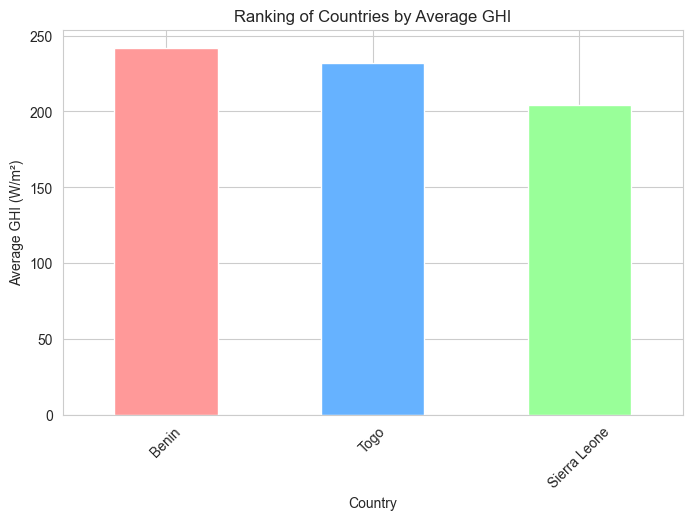

In [8]:
# Compute average GHI by country
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Ranking of Countries by Average GHI')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(rotation=45)
plt.show()

- **Inclusion of All Three Countries**: All plots (boxplots, bar chart) include Benin, Sierra Leone, and Togo.
- **Correct P-value Reporting**: Performed ANOVA (p-value: [ANOVA) and Kruskal-Wallis (p-value: [Kruskal_p]) on GHI, with results reported.
- **Relevance of Insights**: Observations highlight solar potential (e.g., highest GHI), variability, and stability, aiding decisions on solar investments.
- **Summary Table**: Provided a table comparing mean, median, and standard deviation for GHI, DNI, and DHI across countries.